<a href="https://colab.research.google.com/github/ritwiks9635/My_priject_file_5/blob/main/Traffic_Sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dataset in kaggle

In [ ]:
# data_set = https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification

Import requires model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import Dropout, Input, Add, Dense, Activation, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.models import Model

In [ ]:
# Extract zip file

In [ ]:
from zipfile import ZipFile
data = "/content/https:/www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/traffic-sign-dataset-classification.zip"
with ZipFile(data,"r") as zip:
  zip.extractall()
  print("the data has been extracted ")

the data has been extracted 


In [ ]:
# load dataset

In [ ]:
dataset = "/content/traffic_Data/DATA"
df = pd.read_csv("/content/labels.csv")
df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [ ]:
# Visualize some image

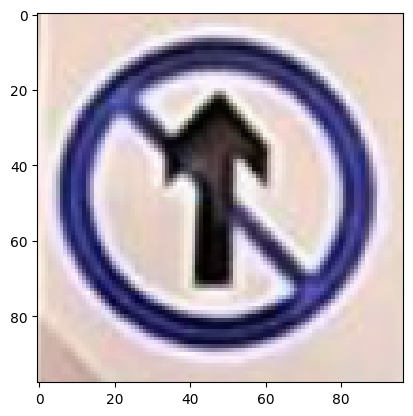

In [ ]:
img = cv2.imread("/content/traffic_Data/DATA/10/010_0009.png")
plt.imshow(img)

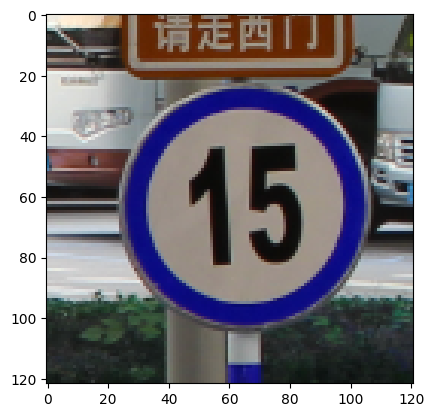

In [ ]:
img = cv2.imread("/content/traffic_Data/DATA/1/001_0018.png")
plt.imshow(img)

Data Preparation

In [ ]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset='training',
                                                               image_size=(
                                                                   224, 224),
                                                               seed=123,
                                                               batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(
                                                                 224, 224),
                                                             seed=123,
                                                             batch_size=32)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [ ]:
# Define the classes

In [ ]:
classes = train_ds.class_names 
class_names = []
for x in classes:
  class_names.append(df["Name"][int(x)])

In [ ]:
len(class_names)

58

In [ ]:
# plot some image with class names

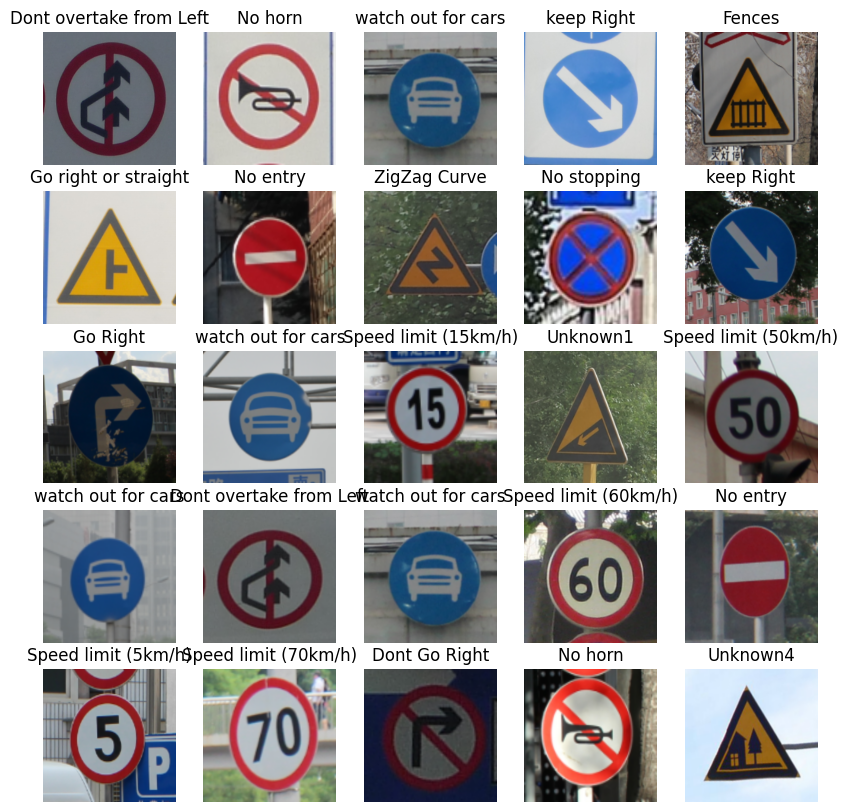

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in train_ds.take(1):
  for x in range(25):
    plt.subplot(5,5,x+1)
    plt.imshow(image[x].numpy().astype("uint8"))
    plt.title(class_names[labels[x]])
    plt.axis("off")

plt.show()

Data Augmentation to help best accuracy

In [ ]:
# Sometimes the data is limited and we
# the model is not performing well with
# limited data. For this method, we use
# Data Augmentation. It is the method to
# increase the amount and diversity in data.

In [ ]:
augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape = (224,224,3)),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
  ])

Create Model Architecture

In [ ]:
model = tf.keras.Sequential()
model.add(augmentation)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1/255))
model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256, (3,3), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation = "relu"))
model.add(Dense(len(df), activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [ ]:
# plot model structure

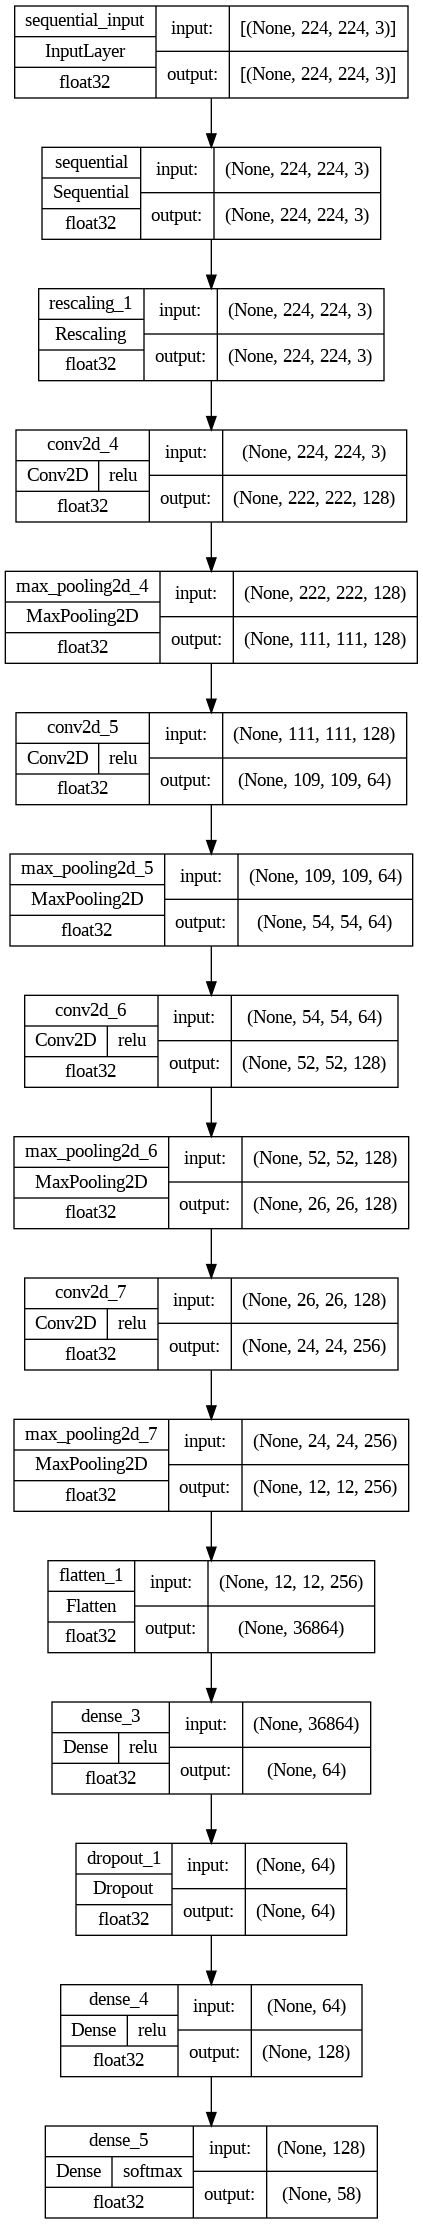

In [ ]:
keras.utils.plot_model(model, show_shapes = True, show_dtype=True, show_layer_activations = True)

# Compile the model

In [ ]:
model.compile(optimizer = "adam", loss = "SparseCategoricalCrossentropy", metrics=["accuracy"])

Training our model

In [ ]:
# We can also use callback function for early stopping the model training.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 5)
history = model.fit(train_ds, validation_data = val_ds, epochs = 50, callbacks = callback)

Epoch 1/50
105/105 [==============================] - 13s 124ms/step - loss: 0.4072 - accuracy: 0.8651 - val_loss: 0.1717 - val_accuracy: 0.9508
Epoch 2/50
105/105 [==============================] - 14s 132ms/step - loss: 0.3522 - accuracy: 0.8777 - val_loss: 0.1542 - val_accuracy: 0.9532
Epoch 3/50
105/105 [==============================] - 13s 125ms/step - loss: 0.3525 - accuracy: 0.8840 - val_loss: 0.1609 - val_accuracy: 0.9484
Epoch 4/50
105/105 [==============================] - 14s 126ms/step - loss: 0.3798 - accuracy: 0.8762 - val_loss: 0.1520 - val_accuracy: 0.9580
Epoch 5/50
105/105 [==============================] - 13s 124ms/step - loss: 0.3418 - accuracy: 0.8861 - val_loss: 0.1661 - val_accuracy: 0.9496
Epoch 6/50
105/105 [==============================] - 13s 124ms/step - loss: 0.3581 - accuracy: 0.8786 - val_loss: 0.1512 - val_accuracy: 0.9580
Epoch 7/50
105/105 [==============================] - 13s 125ms/step - loss: 0.3389 - accuracy: 0.8903 - val_loss: 0.1412 - val_ac

Model Evaluation

In [ ]:
# Let’s visualize the training and validation accuracy with each epoch.

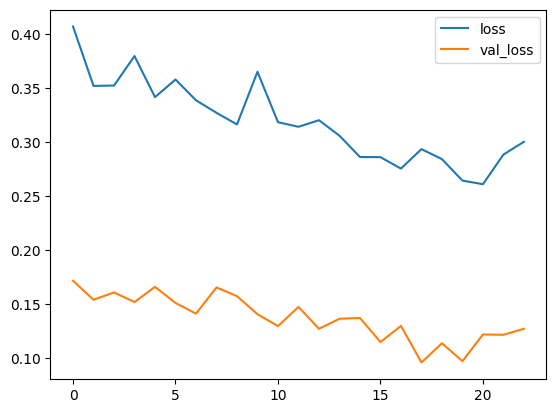

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

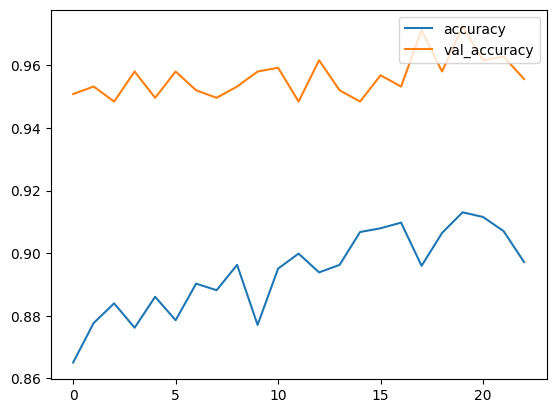

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')